# <code>Bibliotecas<code>

In [1]:
import pandas as pd
from random import randint
CASO_PROMEDIO = pd.read_csv("./data.csv")
import matplotlib.pyplot as plt
TESTS = 999

# <code>Clases<code>

In [2]:
from dataclasses import dataclass
from turtle import pos, position
class Music:
    def __init__(self,data) -> None:
        self.trackName = data[0]
        self.artist = data[1]
        self.album = data[2]
        self.isrc = data[3]
        self.duration = data[4]
        self.year = data[5]
        self.month = data[6]
        self.day = data[7]
    def __repr__(self) -> str:
        str = ""
        # str += f"Track Name: {self.trackName}\n"
        # str+= f"\tArtist: {self.artist}\n"
        # str+= f"\tAlbum: {self.album}\n"
        str+= f"\tIsrc: {self.isrc}\n"
        # str+= f"\tDuration(min): {self.duration}\n"
        # str+= f"\tDate: {self.year}/{self.month}/{self.day}\n"
        return str







@dataclass
class Search():
    attr:str=""
    cont:int=0
    contEsp = 0
    
     
    def I_busquedaLinea(self,lista,llave):                      #O(n)
        self.contEsp+=1
        i = 0                                                   #3
        while i<len(lista):                                     #4(n+1)
            self.cont+=1
            if(llave==getattr(lista[i],self.attr)):             #7(n+1)
                return i                                        #2(n+1)
            i+=1                                                #4(n+1)
        return -1                                               #3(n+1)
        #P(n)=20n+17

    def R_busquedaLineal(self,lista,llave,i):                   #O()
        self.cont+=1
        self.contEsp+=1
        if(i<len(lista)):                                       #4(n+1)
            if(llave==getattr(lista[i],self.attr)):             #7(n+1)
                return i                                        #2(n+1)
            return self.R_busquedaLineal(lista,llave,i+1)       #8(n+1)
        return -1                                               #3(n+1)
        #P(n)=23n+23
    


    def I_binaria(self,lista,llave):
        self.contEsp+=1
        l = 0                                                   #3
        r = len(lista)-1                                        #5
        index = -1                                              #4
        found = False                                           #3
        while found == False and l<=r:                          #8(log_2 n)
            self.cont+=1                                        
            m = (r+l) // 2                                      #7(log_2 n)
            cmp = getattr(lista[m],self.attr)                   #6(log_2 n)
            if llave==cmp:                                      #4(log_2 n)
                found = True                                    #3(log_2 n)
                index = m                                       #3(log_2 n)
            elif cmp > llave:                                   #4(log_2 n)
                r = m - 1                                       #5(log_2 n)
            else:                                               #(log_2 n)
                l = m + 1                                       #5(log_2 n)
        return index                                            #2(log_2 n)
        #P(n)=48(log_2 n)+15


    def R_binaria(self,lista,llave,l,r,index=-1):
        self.cont+=1
        self.contEsp+=1
        if l<=r:                                                #4(log_2 n)
            m=(r+l) // 2                                        #7(log_2 n)
            cmp = getattr(lista[m],self.attr)                   #6(log_2 n)
            if llave == cmp:                                    #4(log_2 n)
                index = m                                       #3(log_2 n)
            elif cmp > llave:                                   #4(log_2 n)
                return self.R_binaria(lista,llave,l,m-1,index)  #10(log_2 n)
            else:                                               #(log_2 n)
                return self.R_binaria(lista,llave,m+1,r,index)  #10(log_2 n)
        return index                                            #2(log_2 n)
        #P(n)=51(log_2 n)






@dataclass
class Sort:
    attr:str=""
    cont:int=0

    
    def burbuja(self,lista): 
        arreglo = len(lista) 
        i = 0
        while i < len(lista):         
            j=0
            while j < len(lista)-1: 
                self.cont+=1 
                if getattr(lista[j],self.attr) > getattr(lista[j + 1],self.attr):      
                    temp = lista[j]      
                    lista[j] = lista[j+1]      
                    lista[j+1] = temp
                j+=1 
            i+=1     

    def CrearSubArreglo(self,A,indIzq,indDer):
        return A[indIzq:indDer+1]

    def Merge(self,A,p,q,r):
        Izq = self.CrearSubArreglo(A,p,q)                  
        Der = self.CrearSubArreglo(A,q+1,r)               
        i = 0    
        j = 0    
        for k in range(p,r+1):    
            self.cont+=1                                    
            if(j >= len(Der)) or (i < len(Izq) and getattr(Izq[i],self.attr) < getattr(Der[j],self.attr)):    
                A[k] = Izq[i]                                           
                i = i + 1                                               
            else:                                                       
                A[k] = Der[j]                                            
                j = j + 1
                
    def MergeSort(self,A,p,r):
        self.cont+=1                                    
        if r - p > 0:             
            q = int((r+p) / 2)      
            self.MergeSort(A,p,q)        
            self.MergeSort(A,q+1,r)      
            self.Merge(A,p,q,r)          

# <code>Funciones<code>

In [3]:
def obtenerDatos(db:pd.DataFrame,len):
    return [Music(list(db.iloc[i])) for i in range(len)]

# <code>Variables Globales<code>

In [4]:
search = Search()
sort = Sort()

# Búsqueda lineal Iterativa
## Análisis Temporal
### Mejor Caso de Complejidad
El mejor caso de complejidad ocurre cuando el nodo que estamos buscando se encuentra al inicio de nuestro conjunto, por lo que solo haríamos una iteración y tendríamos una complejidad:
$$\Omega(1)$$

Text(0, 0.5, 'Número de Operaciones')

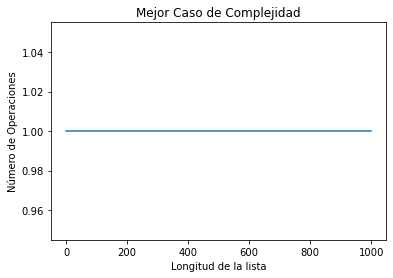

In [5]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "duration"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[0]
    search.cont=0
    search.I_busquedaLinea(tt,nodo.duration)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")


### Peor Caso de Complejidad
El peor caso ocurriría cuando el nodo que estamos buscando no se encuentra en el conjunto de nuestro arreglo, así que recorreríamos todo el arreglo sin encontrar el elemento buscado y nos daría una complejidad:
$$\mathcal{O}(n)$$

Text(0, 0.5, 'Número de Operaciones')

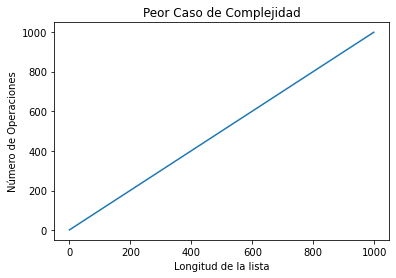

In [6]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "duration"
for i in X:
    tt = musicas[:i+1]
    search.cont=0
    search.I_busquedaLinea(tt,301)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Caso Promedio de Complejidad
El caso promedio es un conjunto aleatorio en donde la complejidad dependerá de la posición en la que se encuentra el elemento que estamos buscando, esto quiere decir que podemos encontrar nuestro elemento en el primer o último indice de nuestro arreglo, dando una complejidad de:
$$\theta(n-i)$$
Donde $i$ es el índice de nuestro elemento pero se cumple que:
$$i\leq n$$
Por lo tanto, en el caso promedio tenemos:
$$\theta(n)$$

Text(0, 0.5, 'Número de Operaciones')

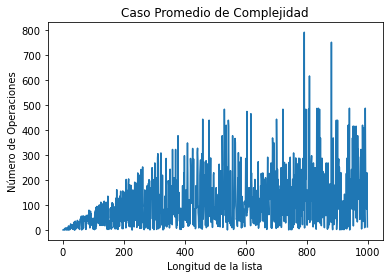

In [7]:


X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "duration"
for i in X:
    tt = musicas[:i+1]
    index = randint(0,i)
    nodo = tt[index]
    search.cont=0
    search.I_busquedaLinea(tt,nodo.duration)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

## Análisis de Complejidad Espacial.
### Mejor, Peor y Promedio.
En la búsqueda lineal de un nodo, lo único que creamos en el algoritmo es un índice, independientemente del tamaño de nuestro conjunto, en otras palabras, el consumo de memoria es constante.
$$S(1)$$

Text(0, 0.5, 'Memoria Consumida')

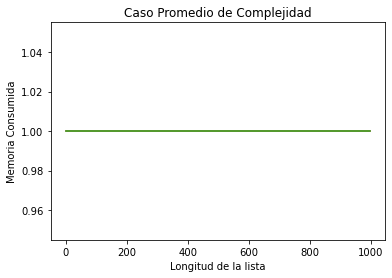

In [8]:
#mejor
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "duration"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[0]
    search.cont=0
    search.contEsp=0
    search.I_busquedaLinea(tt,nodo.duration)
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")
#Peor
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "duration"
for i in X:
    tt = musicas[:i+1]
    search.cont=0
    search.contEsp=0
    search.I_busquedaLinea(tt,301)
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")
#promedio
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "duration"
for i in X:
    tt = musicas[:i+1]
    index = randint(0,i)
    nodo = tt[index]
    search.cont=0
    search.contEsp=0
    search.I_busquedaLinea(tt,nodo.duration)
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

# Búsqueda Lineal Recursiva
Las explicaciones planteadas para el caso de la implementación iterativa son completamente extrapolables a este contexto; el comportamiento es muy similar.
## Análisis Temporal
### Mejor Caso de Complejidad
$$\Omega(1)$$

Text(0, 0.5, 'Número de Operaciones')

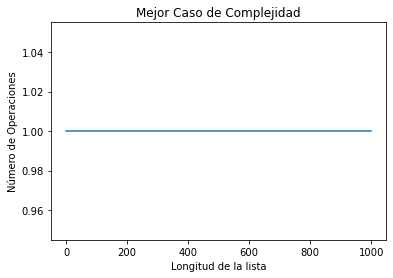

In [9]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "trackName"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[0]
    search.cont=0
    search.contEsp=0
    search.R_busquedaLineal(tt,nodo.trackName,0)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Peor Caso de Complejidad
$$\mathcal{O}(n)$$

Text(0, 0.5, 'Número de Operaciones')

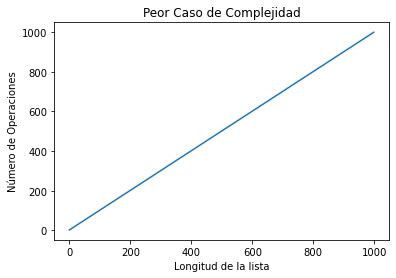

In [10]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "trackName"
for i in X:
    tt = musicas[:i+1]
    search.cont=0
    search.contEsp=0
    search.R_busquedaLineal(tt,"·",0)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Caso Promedio de Complejidad
$$\theta(n)$$

Text(0, 0.5, 'Número de Operaciones')

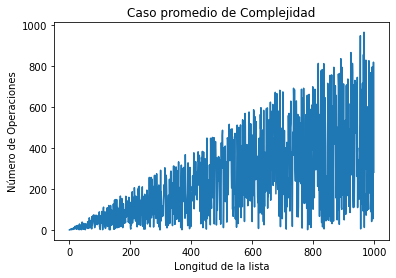

In [11]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "trackName"
for i in X:
    tt = musicas[:i+1]
    index = randint(0,i)
    nodo = tt[index]
    search.cont=0
    search.contEsp=0
    search.R_busquedaLineal(tt,nodo.trackName,0)
    Y.append(search.cont)

plt.plot(X,Y)
plt.title("Caso promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

Nota:Las caídas en la gráfica son debidas a que encuentra el elemento antes por lo que es contador no llega hasta $n$ 

## Análisis de Complejidad Espacial.
La recursividad tienen una desventaja, genera una pila de llamadas que se almacena en el stack, este consumo de memoria se contabiliza para el análisis provocando las siguientes complejidades:
### Mejor Caso de Complejidad.
Habíamos explicado que cuando el nodo buscado es el primero teníamos el mejor caso de complejidad temporal y resulta ser también el mejor para el espacial ya que se genera una única llamada.
$$\Omega(1)$$

Text(0, 0.5, 'Número de Operaciones')

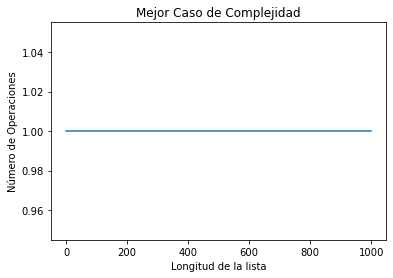

In [12]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "trackName"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[0]
    search.cont=0
    search.contEsp=0
    search.R_busquedaLineal(tt,nodo.trackName,0)
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

### Peor Caso de Complejidad.
Cuando el nodo buscado no existe dentro del conjunto la funcion se llamara $n$ veces generando un consumo de memoria de $n$ en la pila de llamadas.
$$S(n)$$

Text(0, 0.5, 'Memoria Consumida')

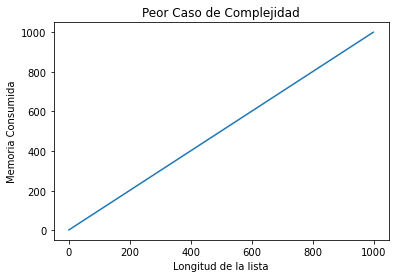

In [20]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "trackName"
for i in X:
    tt = musicas[:i+1]
    search.cont=0
    search.contEsp=0
    search.R_busquedaLineal(tt,"·",0)
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

### Caso Promedio de Complejidad.
Cuando el nodo buscado si esta en el conjunto pero no sabemos exactamente en donde, tendriamos que llamar $i$ veces donde $i$ es el indice en el que se encuentra el elemento. Entonces la complejidad seria $S(i)$ pero como $n>i$ entonces:
$$S(n)$$

Text(0, 0.5, 'Número de Operaciones')

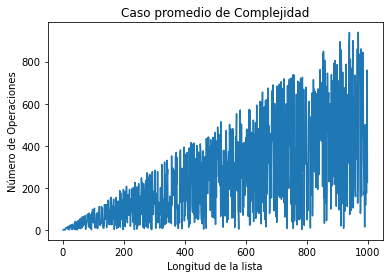

In [14]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "trackName"
for i in X:
    tt = musicas[:i+1]
    index = randint(0,i)
    nodo = tt[index]
    search.cont=0
    search.contEsp=0
    search.R_busquedaLineal(tt,nodo.trackName,0)
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Caso promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

# Busqueda Binaria Iterativa con ordenamiento $\mathcal{O}(n^2)$
## Analisis de Complejidad Temporal
### Mejor Caso de Complejidad
El mejor caso ocurre cuando el elemento que buscamos se encuentra justo en el medio de nuestro conjunto ya que al ser un arreglo ordenado, solo se iteraría 1 vez y a esto le sumamos la complejidad de BubbleSort por lo que la complejidad sería:
$$\Omega(n^2+1)$$


Text(0, 0.5, 'Número de Operaciones')

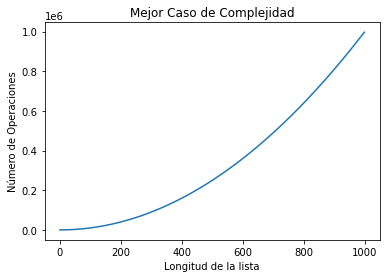

In [17]:
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.burbuja(tt)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    search.I_binaria(tt,nodo.isrc)
    Y.append(sort.cont+search.cont)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Peor Caso de Complejidad
Este caso solo ocurre cuando el nodo buscado tiene un valor mayor al máximo o menor al mínimo ya que tardaríamos más tiempo en determinar que el elemento no se encuentra en el conjunto aunque esto no cambia la complejidad de:
$$\mathcal{O}(n^2+\log_2 n)$$

Text(0, 0.5, 'Número de Operaciones')

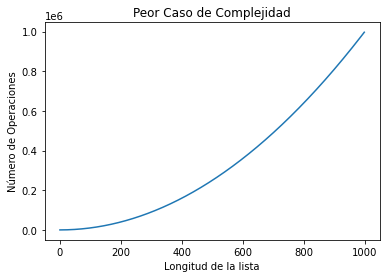

In [18]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    indi.append(search.I_binaria(tt,'$'))
    Y.append(sort.cont+search.cont)

plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Caso Promedio de Complejidad
La complejidad para el caso promedio esta compuesta por la complejidad de bubbleSort $\mathcal{O}(n^2)$ y la búsqueda binaria que tarda un tiempo logarítmico en determinar la posición del elemento buscado porque en cada iteracíon desecha la mitad de los elementos del subconjunto en donde esta nuestro elemento.
$$\theta(n^2+\log_2 n) $$

Text(0, 0.5, 'Número de Operaciones')

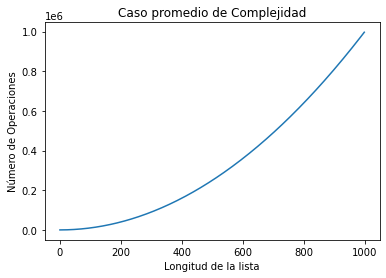

In [19]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[randint(0,len(tt)-1)]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    indi.append(search.I_binaria(tt,nodo.isrc))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Caso promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

## Análisis de Complejidad Espacial.
### Mejor, Peor y Caso Promedio.
Nuevamente complejidad espacial es constante, ya que no consumimos mas memoria con cada iteración.
$$S(1)$$

In [21]:
#mejor
X = range(TESTS)
Y = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.burbuja(tt)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    search.contEsp=0
    search.I_binaria(tt,nodo.isrc)
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")
#peor
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    search.contEsp=0
    indi.append(search.I_binaria(tt,'$'))
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")
#promedio
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[randint(0,len(tt)-1)]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    search.contEsp=0
    indi.append(search.I_binaria(tt,nodo.isrc))
    Y.append(search.contEsp)
plt.plot(X,Y)
plt.title("Caso promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

KeyboardInterrupt: 

# Busqueda Binaria Iterativa con ordenamiento $\mathcal{O}(n \log_2(n))$
## Analisis de Complejidad Temporal
### Mejor Caso de Complejidad
Nuevamente el mejor caso ocurre cuando el elemento se encuentra justo a la mitad del arreglo, solo se iteraría una vez y al ser un tiempo constante, se tomaría en cuenta la complejidad del algoritmo de ordenamiento más el constante:
$$\Omega(n\log_2 n + 1)$$


Text(0, 0.5, 'Número de Operaciones')

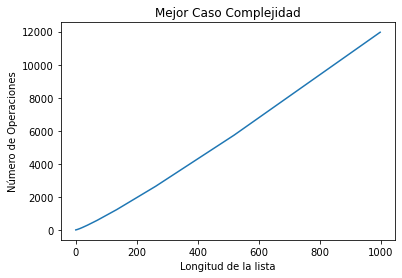

In [22]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    indi.append(search.I_binaria(tt,nodo.isrc))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Mejor Caso Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Peor Caso de Complejidad
El peor caso vuelve a ocurrir cuando el elemento que buscamos tiene un valor mayor al máximo o menor al mínimo dejando lo suma de la complejidad que tiene ordenar el conjunto y hacer la busqueda binaria:
$$\mathcal{O}(n\log_2 n +\log_2 n)$$

Text(0, 0.5, 'Número de Operaciones')

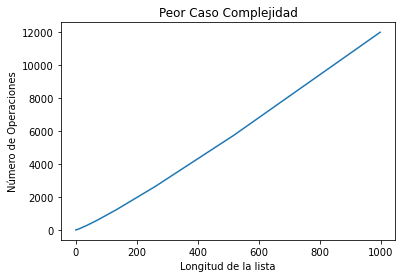

In [23]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    indi.append(search.I_binaria(tt,"$"))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Peor Caso Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Caso Promedio de Complejidad
La complejidad para el caso promedio esta compuesta por la complejidad de bubbleSort $\mathcal{O}(n\log_2 n)$ y la búsqueda binaria que tarda un tiempo logarítmico en determinar la posición del elemento buscado porque en cada iteracíon desecha la mitad de los elementos del subconjunto en donde esta nuestro elemento.
$$\theta(n\log_2 n + \log_2 n)$$

Text(0, 0.5, 'Número de Operaciones')

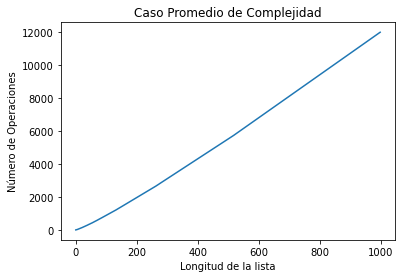

In [24]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    nodo = tt[randint(0,len(tt)-1)]
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    indi.append(search.R_binaria(tt,nodo.isrc,0,len(tt)-1))
    Y.append(sort.cont+search.cont)

plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

## Análisis de Complejidad Espacial.
### Mejor, Peor y Caso promedio de Complejidad.
La implementación que nosotros construimos solo necesita de unas cuantas variables para funcionar, no importando el tamaño del conjunto de búsqueda. Es por esto que su consumo de memoria será constante, porque no se crean nuevas variables solo cambian de valor.
$$\mathcal{O}(1)$$

In [ ]:
#mejor
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    search.contEsp=0
    indi.append(search.I_binaria(tt,nodo.isrc))
    Y.append(search.contEsp)
plt.plot(X,Y)
plt.title("Mejor Caso Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")
#peor
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    search.contEsp=0
    indi.append(search.I_binaria(tt,"$"))
    Y.append(search.contEsp)
plt.plot(X,Y)
plt.title("Peor Caso Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")
#promedio
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    nodo = tt[randint(0,len(tt)-1)]
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    search.contEsp=0
    indi.append(search.I_binaria(tt,nodo.isrc))
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

# Busqueda Binaria Recursiva con ordenamiento $\mathcal{O}(n^2)$
La implementación recursiva de este algoritmo no cambia de complejidades ya que su comportamiento es similar a su versión iterativa y por lo tanto las complejidades y casos anteriormente descritas son extrapolables.
## Analisis de Complejidad Temporal
### Mejor Caso de Complejidad
$$\Omega(n^2+1)$$

Text(0, 0.5, 'Número de Operaciones')

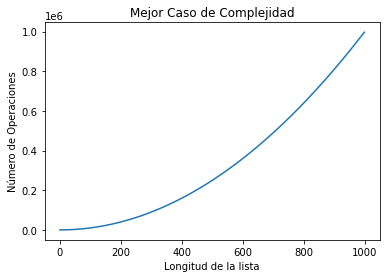

In [25]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.burbuja(tt)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    indi.append(search.R_binaria(tt,nodo.isrc,0,len(tt)-1))
    Y.append(sort.cont+search.cont)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Peor Caso de Complejidad
$$\mathcal{O}(n^2+\log_2 n)$$

Text(0, 0.5, 'Memoria Consumida')

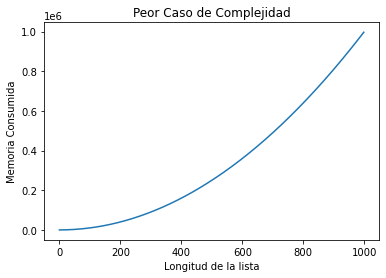

In [39]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    indi.append(search.R_binaria(tt,'$',0,len(tt)-1))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

### Caso Promedio de Complejidad
$$\theta(n^2+\log_2 n) $$

In [ ]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[randint(0,len(tt)-1)]
    sort.cont=0
    sort.burbuja(tt)
    search.cont=0
    index  =search.R_binaria(tt,nodo.isrc,0,len(tt)-1)
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumiad")

## Análisis de Complejidad Espacial.
La memoria consumida en la implementación recursiva solo depende de las llamadas que se hacen, por lo que las complejidades espaciales para cada caso seran iguales a las temporales.
### Mejor Caso de Complejidad Espacial.
Será:
$$S(1)$$

Text(0, 0.5, 'Memoria Consumida')

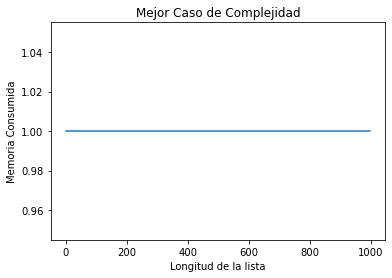

In [36]:
#mejor
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    search.contEsp=0
    indi.append(search.R_binaria(tt,nodo.isrc,0,len(tt)-1))
    Y.append(search.contEsp)

plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

### Peor Caso de Complejidad Espacial.
Será:
$$S(\log_2n)$$

Text(0, 0.5, 'Memoria Consumida')

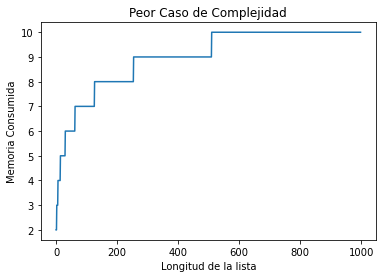

In [37]:
#peor
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont=0
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont=0
    search.contEsp=0
    indi.append(search.R_binaria(tt,'$',0,len(tt)-1))
    Y.append(search.contEsp)
plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

### Caso Promedio de Complejidad.
Será:
$$S(\log_2n)$$

Text(0, 0.5, 'Memoria Consumida')

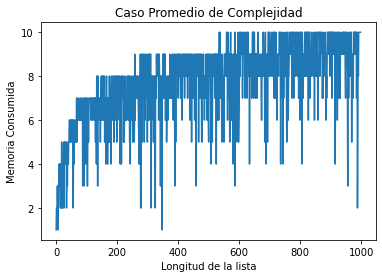

In [38]:
#promedio
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    nodo = tt[randint(0,len(tt)-1)]
    sort.cont=0
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont=0
    search.contEsp=0
    index  =search.R_binaria(tt,nodo.isrc,0,len(tt)-1)
    Y.append(search.contEsp)
plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

# Busqueda Binaria Recursiva con ordenamiento $\mathcal{O}(n \log_2(n))$
## Analisis de Complejidad Temporal
### Mejor Caso de Complejidad
$$\Omega(n\log_2 n + 1)$$

Text(0, 0.5, 'Número de Operaciones')

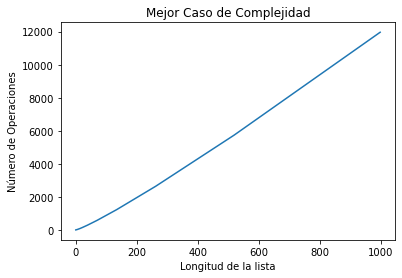

In [27]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    indi.append(search.R_binaria(tt,nodo.isrc,0,len(tt)-1))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Peor Caso de Complejidad 
$$\mathcal{O}(n\log_2 n +\log_2 n)$$

Text(0, 0.5, 'Número de Operaciones')

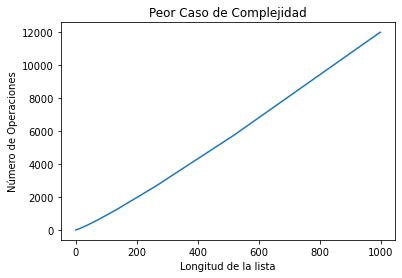

In [28]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    indi.append(search.R_binaria(tt,"$",0,len(tt)-1))
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

### Caso Promedio de Complejidad
$$\theta(n\log_2 n+\log_2 n) $$

Text(0, 0.5, 'Número de Operaciones')

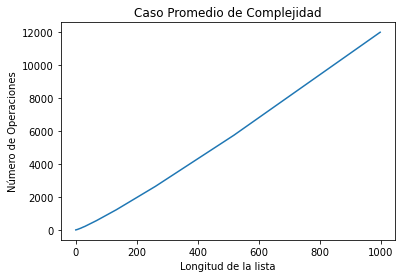

In [29]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    nodo = tt[randint(0,len(tt)-1)]
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    search.R_binaria(tt,nodo.isrc,0,len(tt)-1)
    Y.append(sort.cont+search.cont)
plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Número de Operaciones")

## Análisis de Complejidad Espacial.
La memoria consumida en la implementación recursiva solo depende de las llamadas que se hacen, por lo que las complejidades espaciales para cada caso seran iguales a las temporales.
### Mejor Caso de Complejidad Espacial.
Será:
$$S(1)$$

Text(0, 0.5, 'Memoria Consumida')

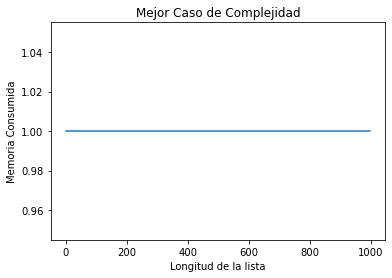

In [30]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    nodo = tt[(len(tt)-1)//2]
    search.cont = 0
    search.contEsp=0
    indi.append(search.R_binaria(tt,nodo.isrc,0,len(tt)-1))
    Y.append(search.contEsp)
plt.plot(X,Y)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

### Peor Caso de Complejidad Espacial.
Será:
$$S(\log_2n)$$

Text(0, 0.5, 'Memoria Consumida')

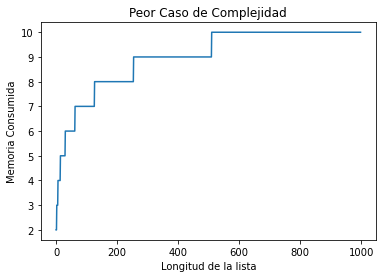

In [32]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    search.contEsp=0
    indi.append(search.R_binaria(tt,'$',0,len(tt)-1))
    Y.append(search.contEsp)
plt.plot(X,Y)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")

### Caso Promedio de Complejidad.
Será:
$$S(\log_2n)$$

Text(0, 0.5, 'Memoria Consumida')

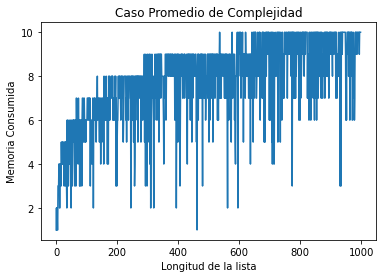

In [34]:
X = range(TESTS)
Y = []
indi = []
musicas = obtenerDatos(CASO_PROMEDIO,TESTS)
search.attr = "isrc"
sort.attr = "isrc"
for i in X:
    tt = musicas[:i+1]
    sort.cont = 0
    nodo = tt[randint(0,len(tt)-1)]
    sort.MergeSort(tt,0,len(tt)-1)
    search.cont = 0
    search.contEsp = 0
    search.R_binaria(tt,nodo.isrc,0,len(tt)-1)
    Y.append(search.contEsp)
plt.plot(X,Y)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Longitud de la lista")
plt.ylabel("Memoria Consumida")